<a href="https://colab.research.google.com/github/Shambhurajdesai/Capstone---1-Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Team_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

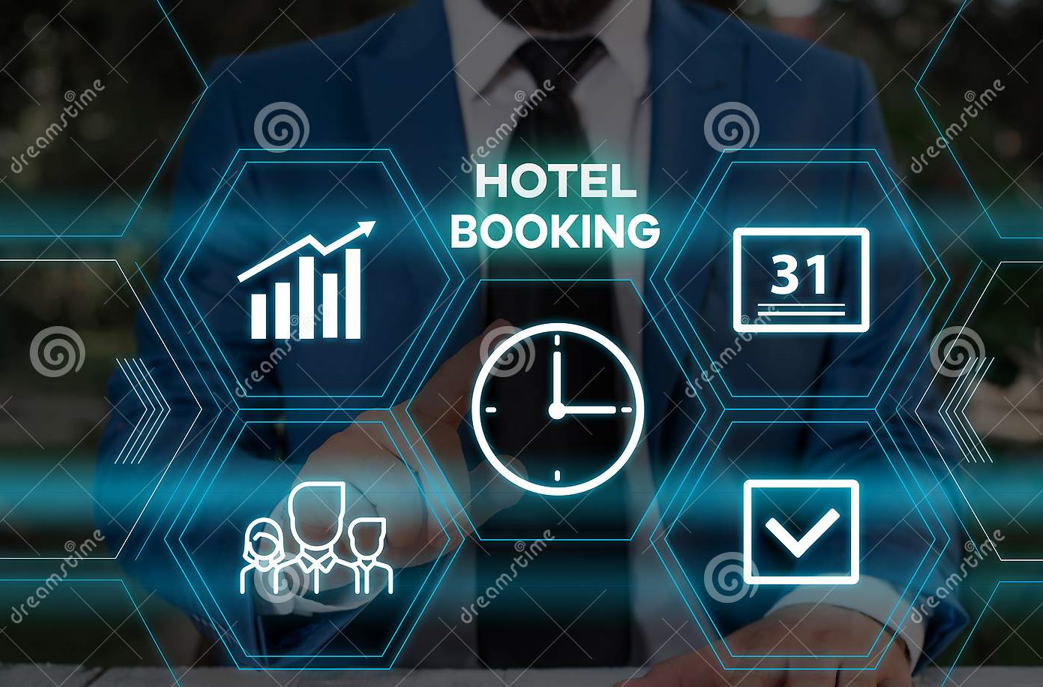

# **Questions**

##1.  What is the percentage of hotels bookings?
##2.  What is the annually number and percentage of arriving visitors?
##3.  Which hotel has more cancellation of bookings?
##4.  Which months has the highest and lowest number of bookings?
##5.  Correlation between numerical feature.
##6.  See if the ADR increases as the number of people increases.
##7.  Which country has the highest number of booking?
##8.  Which Sector should be targeted for our advertisement?
##9.  Which months has cheaper booking rates?





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Almabetter/Module 1 Python for Data Science/EDA Capstone Projects/Hotel Bookings/'
df = pd.read_csv( path + 'Hotel Bookings.csv')

In [ ]:
df.shape

(119390, 32)

In [ ]:
# Check the datatype of each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Checking the missing data
df.isna().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Dropping the columns with missing values
df = df.drop(['agent','company'],axis=1)

In [ ]:
# Dropping the 488 missing values of country and 4 missing values of children columnns
df = df.dropna()

In [ ]:
# Check missing values
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# Now Dataframe has no missing values 

In [ ]:
# Statistical Analysis
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Overview
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
df.tail(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.4,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,A,0,No Deposit,0,Transient,151.2,0,2,Check-Out,2017-09-07


In [ ]:
# Checking hotels
df['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

###Q. What is the percentage of hotels bookings?

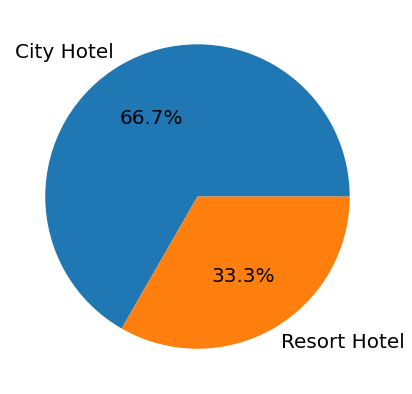

In [ ]:
# % of records(resort hotel and city hotel)
labels = df['hotel'].value_counts().index
sizes = df['hotel'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,autopct='%0.1f%%',textprops={'fontsize': 20})
plt.show()

In [ ]:
# From above pie chart We can see that majority of the people preferred City hotel over Resort hotel

###Q. What is the annually number and percentage of arriving visitors?


In [ ]:
df['arrival_date_year'].value_counts()

2016    56435
2017    40604
2015    21859
Name: arrival_date_year, dtype: int64

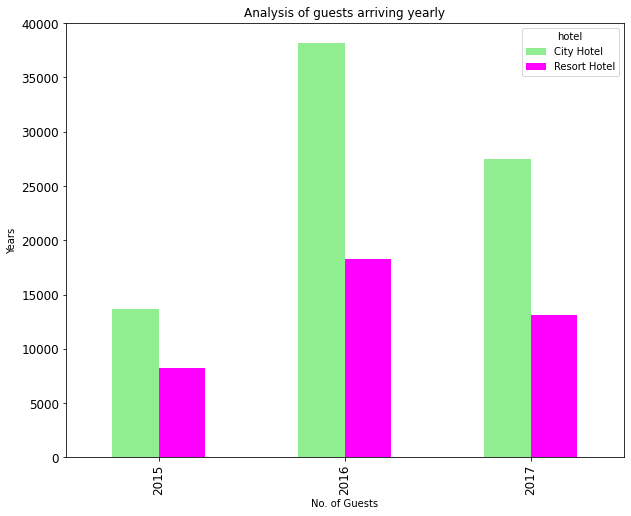

Text(0.5, 0, 'Year')

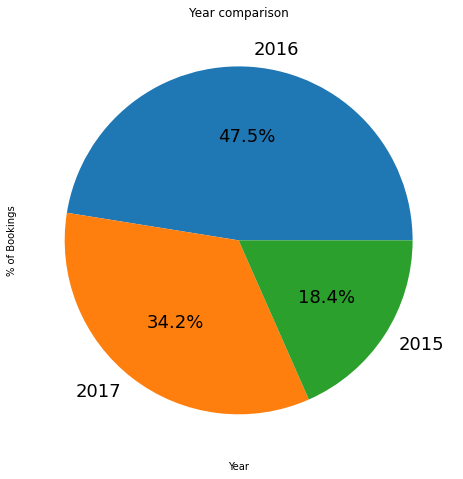

In [ ]:
yearly_arrival_of_guests = df.groupby(['arrival_date_year','hotel'])['hotel'].count().unstack()
yearly_arrival_of_guests.plot(kind='bar',color = ['lightgreen','magenta'],figsize=(10,8),fontsize = 12)
plt.title('Analysis of guests arriving yearly')
plt.xlabel('No. of Guests')
plt.ylabel('Years')
plt.show()

percent = df["arrival_date_year"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.title('Year comparison')
plt.ylabel('% of Bookings')
plt.xlabel('Year')

In [ ]:
# 2016 has more number of bookings than 2015 and 2017.
# we can see that after 2015 bookings increased in 2016 but than decreased in 2017.

###Q. Which hotel has more cancelled bookings?

In [ ]:
df['is_canceled'].value_counts()

0    74745
1    44153
Name: is_canceled, dtype: int64

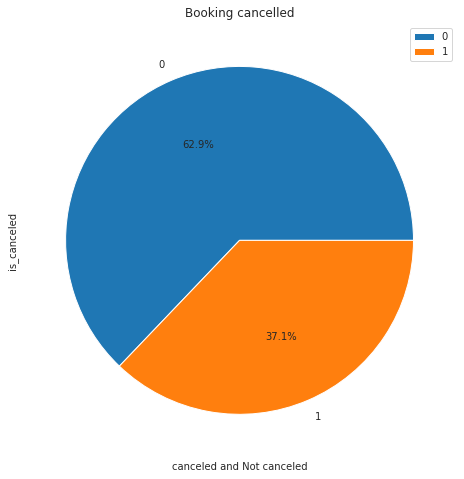

In [ ]:
# Canceled bookings
(df["is_canceled"].value_counts()).plot.pie(autopct="%.1f%%");plt.legend()
plt.title("Booking cancelled")
plt.xlabel("canceled and Not canceled")
plt.legend()
plt.show()

In [ ]:
park = df['required_car_parking_spaces'].value_counts()[:3]
park

0    111588
1      7277
2        28
Name: required_car_parking_spaces, dtype: int64

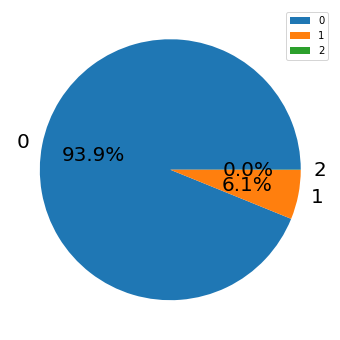

In [ ]:
labels = df['required_car_parking_spaces'].value_counts()[:3].index
sizes = df['required_car_parking_spaces'].value_counts()[:3]

plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,autopct='%0.1f%%',textprops={'fontsize': 20})
plt.legend()
plt.show()

In [ ]:
#here we can say that more than 93% of customers not prefer for the parking, so we can commit that most of the customers reach the hotel by transport

In [ ]:
as_res = df[['reserved_room_type','assigned_room_type']]
as_res

,reserved_room_type,assigned_room_type
0,C,C
1,C,C
2,A,C
3,A,A
4,A,A
...,...,...
119385,A,A
119386,E,E
119387,D,D
119388,A,A


In [ ]:
as_res1 = df.groupby(['reserved_room_type','assigned_room_type'])['reservation_status_date'].count().unstack()
as_res1

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,73408.0,1123.0,1426.0,7415.0,1124.0,410.0,182.0,92.0,211.0,210.0,NaN,NaN
B,111.0,984.0,NaN,5.0,2.0,2.0,8.0,NaN,NaN,2.0,NaN,NaN
C,5.0,2.0,883.0,6.0,4.0,2.0,10.0,10.0,9.0,NaN,NaN,NaN
D,312.0,27.0,34.0,17714.0,683.0,202.0,81.0,9.0,67.0,44.0,NaN,NaN
E,15.0,3.0,8.0,21.0,5890.0,401.0,100.0,4.0,39.0,16.0,NaN,NaN
F,6.0,17.0,NaN,4.0,31.0,2701.0,116.0,2.0,10.0,3.0,NaN,NaN
G,5.0,2.0,2.0,NaN,4.0,13.0,2032.0,6.0,15.0,4.0,NaN,NaN
H,NaN,NaN,NaN,1.0,NaN,NaN,10.0,584.0,6.0,NaN,NaN,NaN
L,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


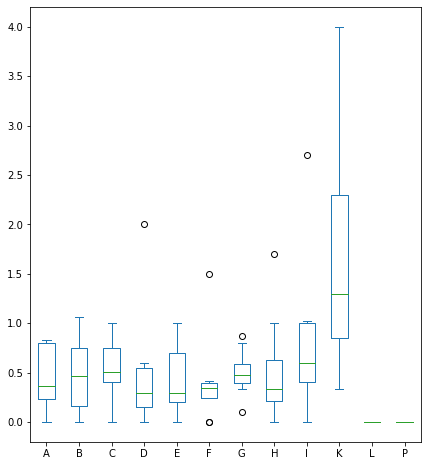

In [ ]:
df.groupby(['reserved_room_type', 'assigned_room_type'])['booking_changes'].mean().unstack().plot(kind="box")
plt.show()

In [ ]:
# outliers are seen in the bookings(D,E,F,G,H,I)

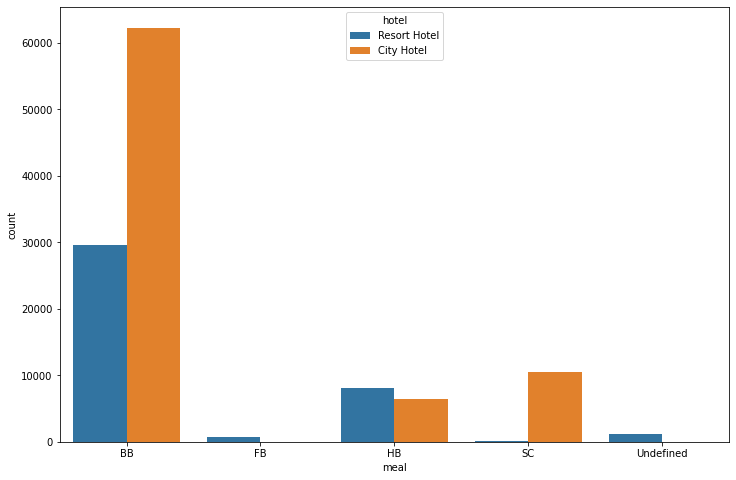

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='meal',hue='hotel',data = df)

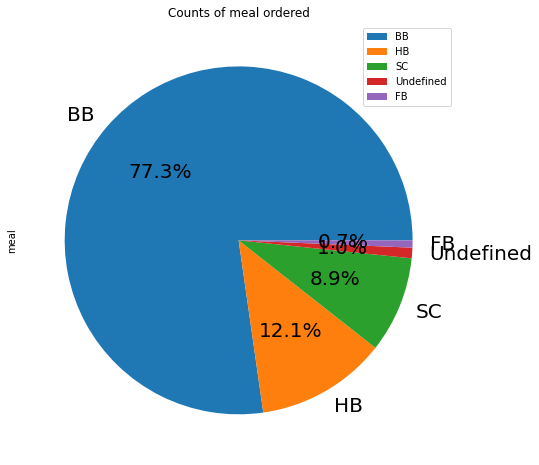

In [ ]:
plt.figure(figsize=(6,6))
df['meal'].value_counts().plot.pie(autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.legend()
plt.title("Counts of meal ordered")
plt.show()

In [ ]:
#Around 77.3% of people preferred (BB) Bed and Breakfast.
#HB(Half board) and SC Booking are 12.1% and 8.9% respectivly and FC(Full Board) Booking are negligible.

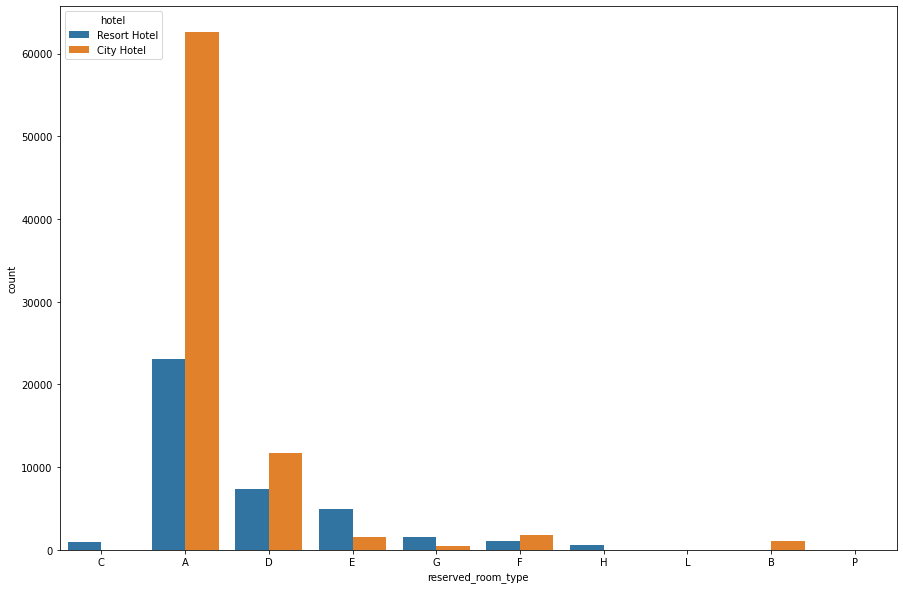

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='reserved_room_type',hue='hotel',data = df)

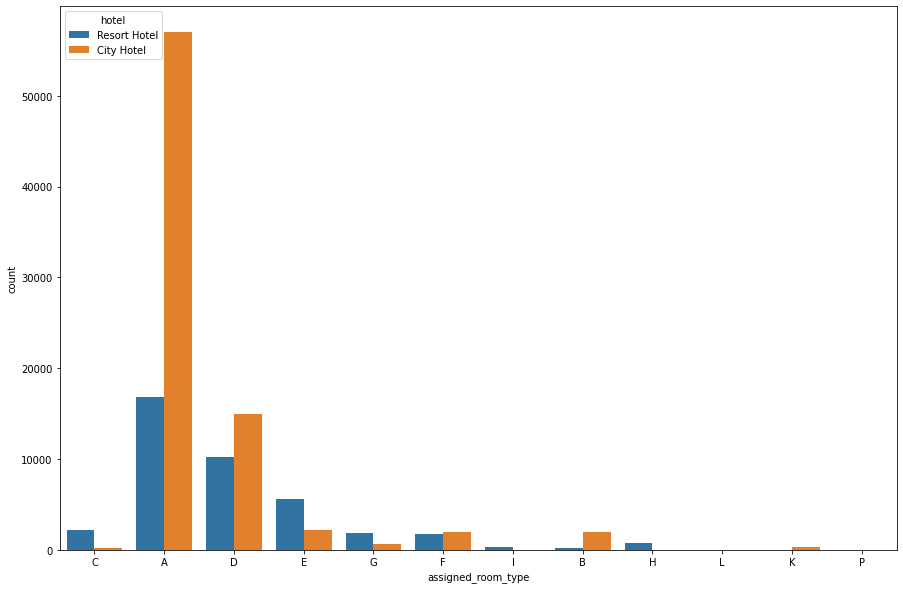

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='assigned_room_type',hue='hotel',data = df)

In [ ]:
# Type A rooms are most perferred by the customers while bookings.

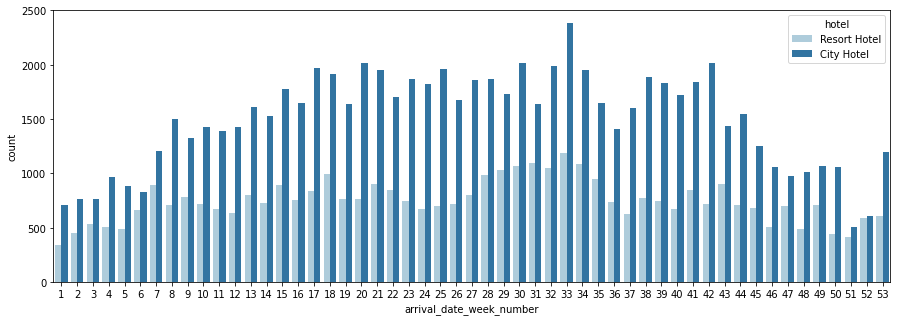

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'arrival_date_week_number',hue='hotel',  palette='Paired')
plt.show()

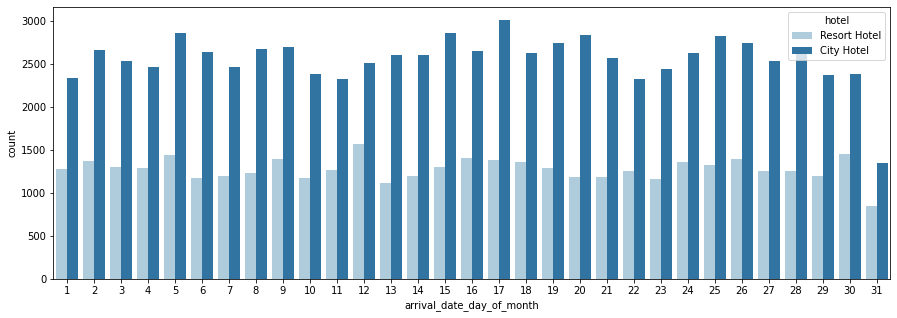

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'arrival_date_day_of_month',hue='hotel',  palette='Paired')
plt.show()

In [ ]:
# From above we can see that month ending has the least number of arrivals in both resort and city hotels.

###Q. Which months has the highest and lowest number of bookings?

In [ ]:
df['arrival_date_month'].value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

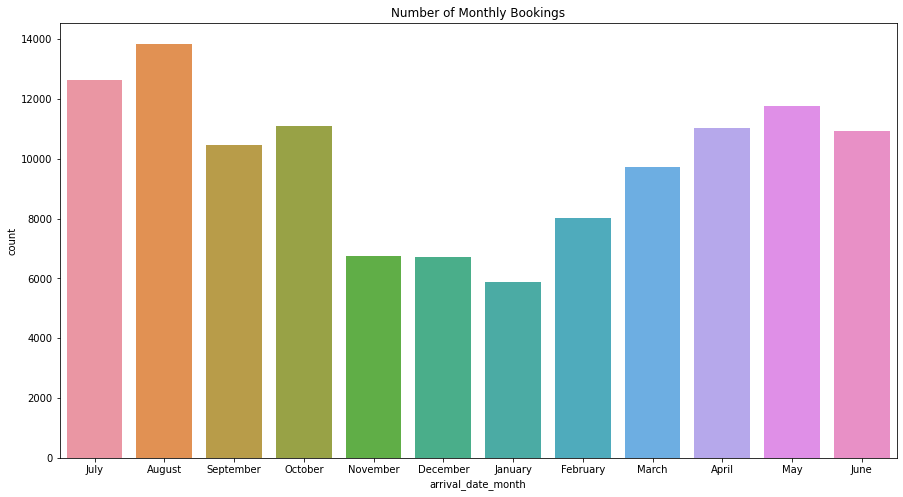

Text(0.5, 1.0, 'Number of Monthly Bookings')

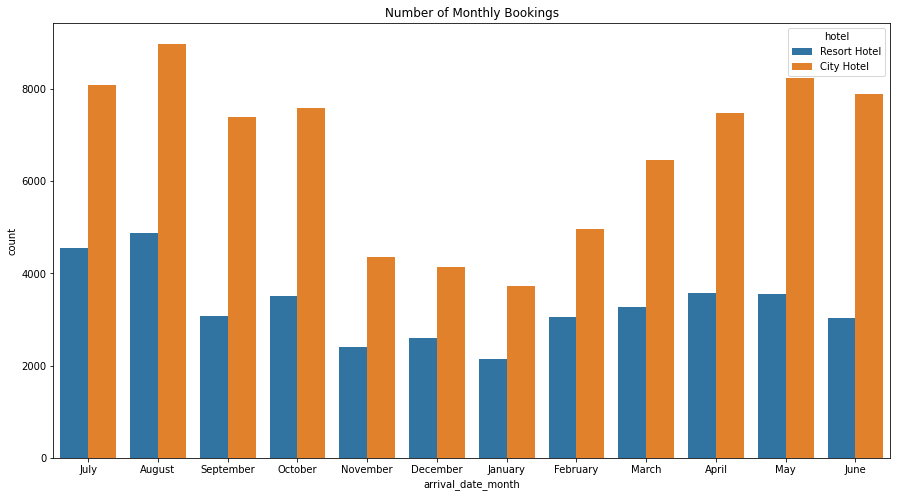

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = df['arrival_date_month']).set_title('Number of Monthly Bookings')
plt.show()
plt.figure(figsize=(15,8))
sns.countplot(x ='arrival_date_month' ,hue = 'hotel',data=df).set_title('Number of Monthly Bookings')


In [ ]:
# August month has the highest number of bookings.
# November,December and January has the lowest number of Bookings.

In [ ]:
df['deposit_type'].value_counts()

No Deposit    104163
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

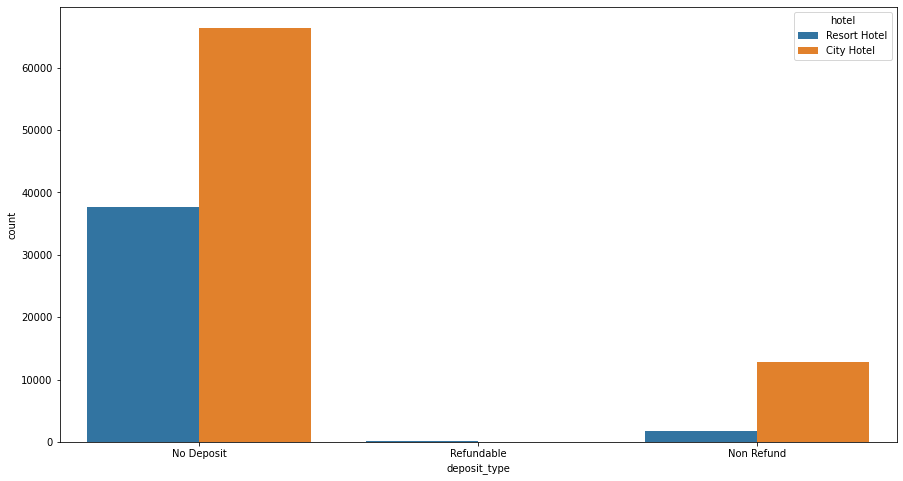

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x ='deposit_type',hue = 'hotel',data=df)
plt.show()

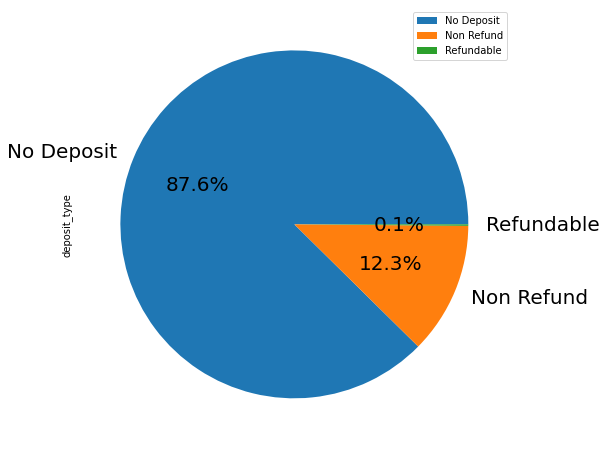

In [ ]:
(df["deposit_type"].value_counts()).plot.pie(autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20});plt.legend()
plt.legend()
plt.show()

In [ ]:
HB=pd.read_csv('/content/drive/MyDrive/Almabetter/Module 1 Python for Data Science/EDA Capstone Projects/Hotel Bookings/Hotel Bookings.csv') 
df=HB.copy()

df=df.drop(columns=["company","agent"])

# for Null children value, replace with rounded median value
df['children'].fillna(round(HB.children.median()), inplace=True)
df = df.dropna(axis = 0)

#As the number of childern should be integer we should convert float to integer
df["children"]=df["children"].astype("int32")

#For Analysis we have to select booking which are not get cancelled
Non_cancel=df[df.is_canceled==0]
Non_cancel["total_stay"]=Non_cancel["stays_in_weekend_nights"]+Non_cancel["stays_in_week_nights"] 
Non_cancel["People"]=Non_cancel["adults"]+Non_cancel["children"]+Non_cancel["babies"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

###Q. Correlation Matrix for important numerical feature

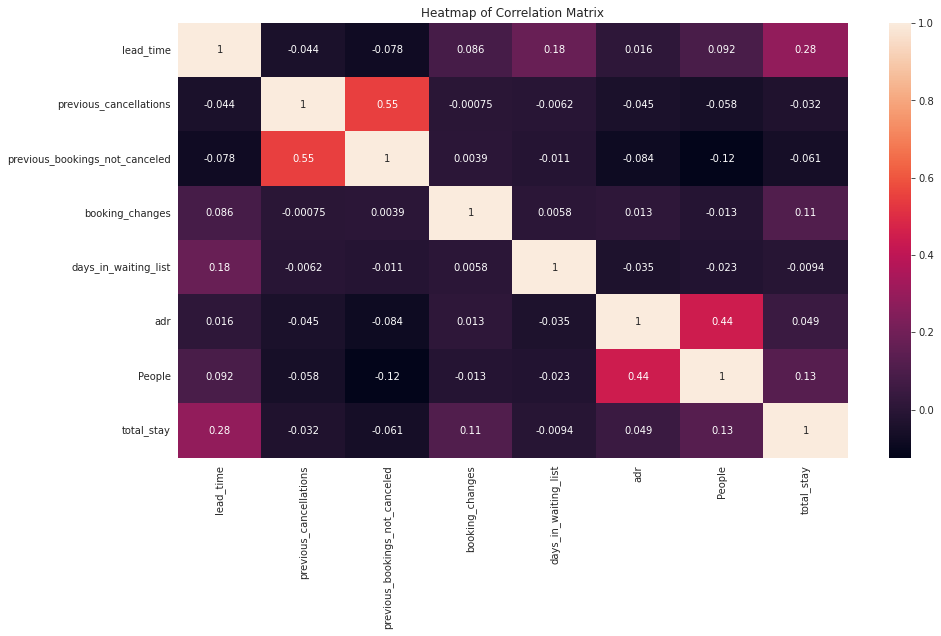

In [ ]:
import seaborn as sns
#list of important numerical features
lst=['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr',"People","total_stay"]
#correlation matrix
CM=Non_cancel[lst].corr()
sns.heatmap(CM,annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()


*  'ADR' is correlated with people as number of people increases earnings increase and so does ADR.
*  Total_stay is correlated with lead_time means longer stays has plan long time before arrival


### Q. See if the ADR increases as the number of people increases.

Text(0, 0.5, 'average daily rate')

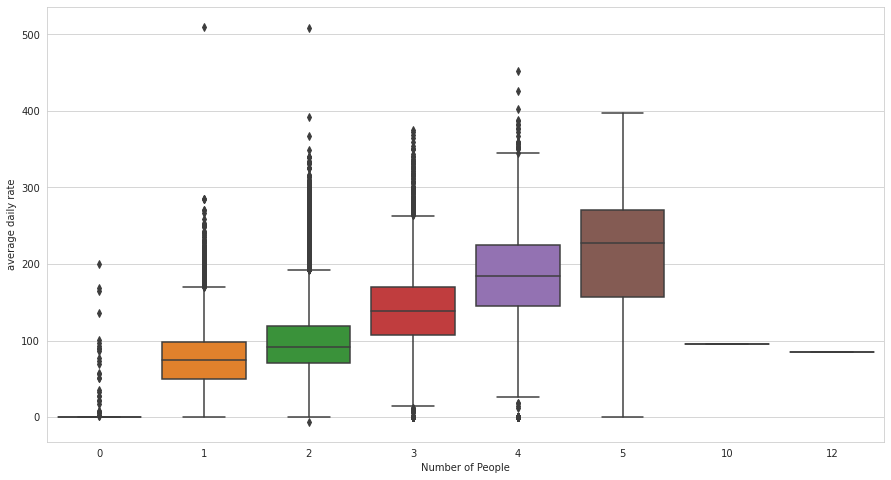

In [ ]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'People', y = 'adr', data = Non_cancel)
plt.xlabel("Number of People")
plt.ylabel("average daily rate")


*  From the plot, we can see that the median value is increasing as the population increases

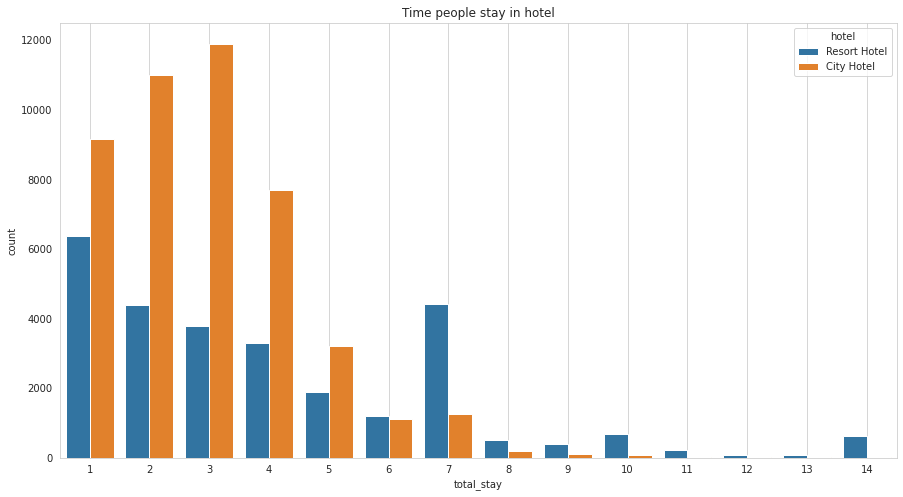

In [ ]:
T = Non_cancel[(Non_cancel["total_stay"]>0) & (Non_cancel['total_stay'] < 15)]
plt.rcParams["figure.figsize"]=[15,8]
sns.countplot(x = T['total_stay'], hue = T['hotel'])
plt.title("Time people stay in hotel");plt.grid();plt.show()


*  City hotel shows pick for 3 days stay which is around 12000 and the maximum number of people stay below 5 days
*  For Resort hotels show a decrease in number as days increase but for a week or 2-week stay there is a considerable increase in count.
*  For day 1 Resort hotels show pick which is greater than 6000.


###Q. Which country has the higest number of booking?

In [ ]:
df['country'].value_counts()[:15]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
Name: country, dtype: int64

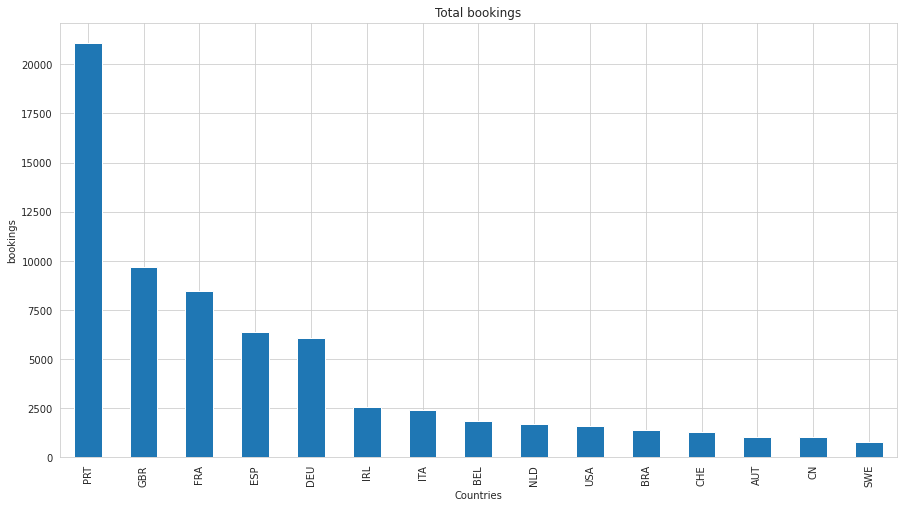

In [ ]:
Non_cancel["country"].value_counts().head(15).plot.bar()
plt.xlabel("Countries")
plt.ylabel('bookings')
plt.title("Total bookings")
plt.show()


*  The country PRT has top booking above 20000 where GBR and FRA are on second and 3rd position. We have highest number of visitors  are from Europe namely Portugal(PRT),United kingdom(GBR),France(FRA),Spain(ESP).


###Q. Which Sector should be targeted for our advertisement?


In [ ]:
df['market_segment'].value_counts()

Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

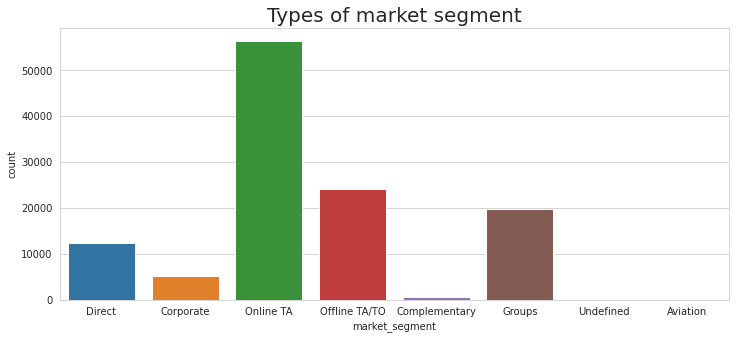

Text(0.5, 1.0, 'Types of distribution channel')

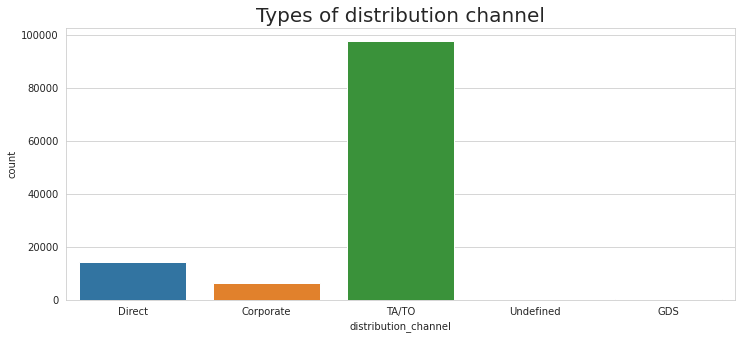

In [ ]:
# Checking Market segments and Distribution channel
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'market_segment').set_title('Types of market segment', fontsize = 20)
plt.show()
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

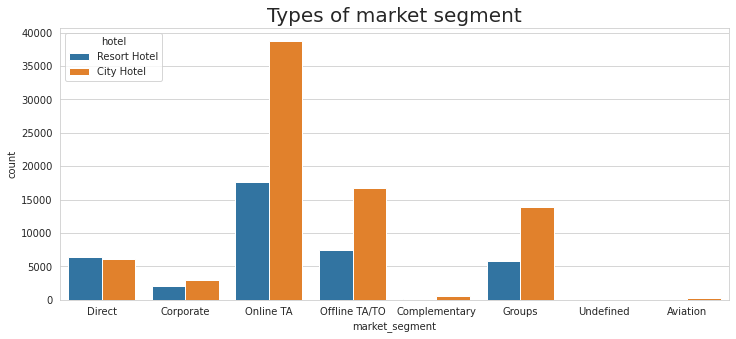

Text(0.5, 1.0, 'Types of market segment in city and resort hotel')

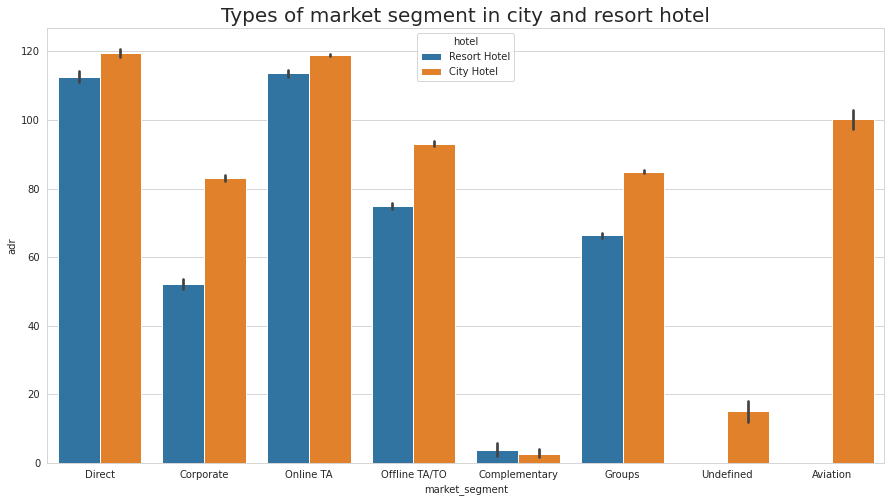

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'market_segment',hue='hotel').set_title('Types of market segment', fontsize = 20)
plt.show()

plt.figure(figsize=(15,8))
sns.barplot(data = df,x='market_segment', y='adr', hue='hotel').set_title('Types of market segment in city and resort hotel', fontsize = 20)


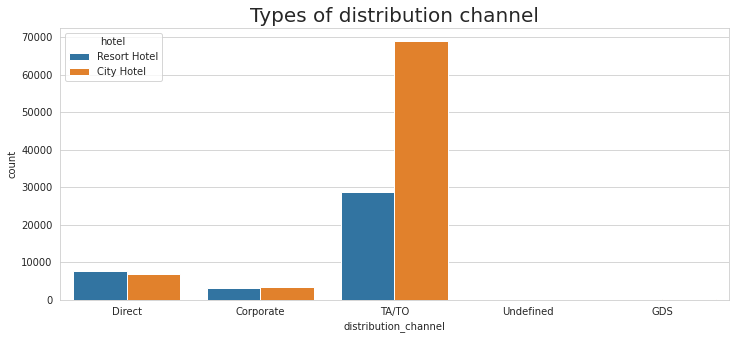

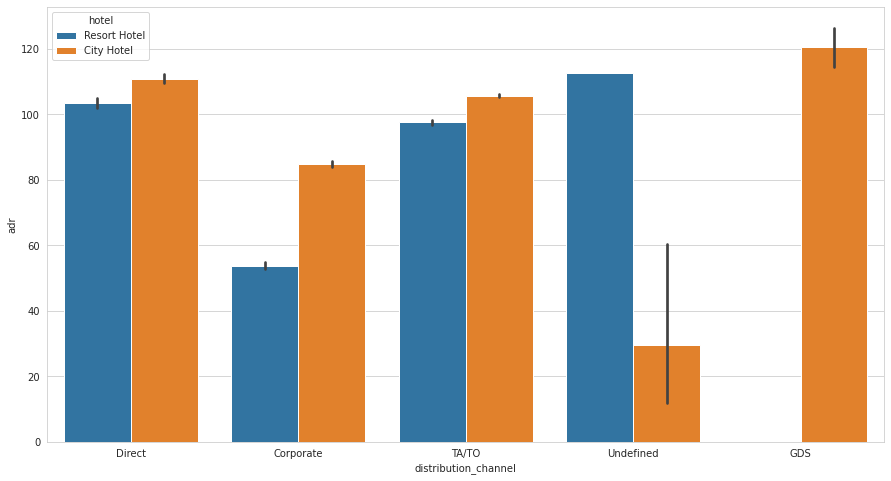

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel',hue='hotel').set_title('Types of distribution channel', fontsize = 20)
plt.show()
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='distribution_channel', y='adr', hue='hotel')


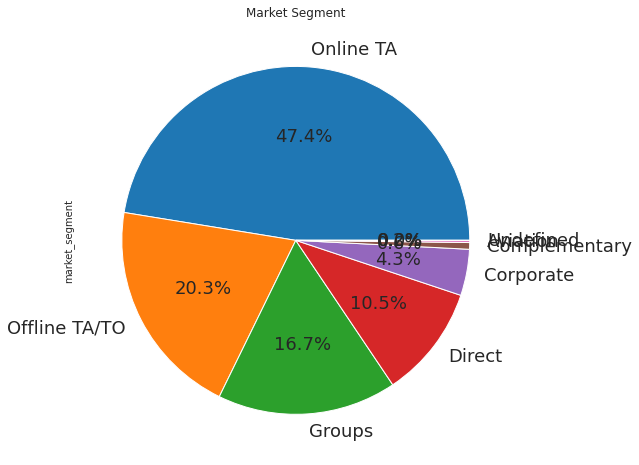

Text(0.5, 1.0, 'Distribution channel')

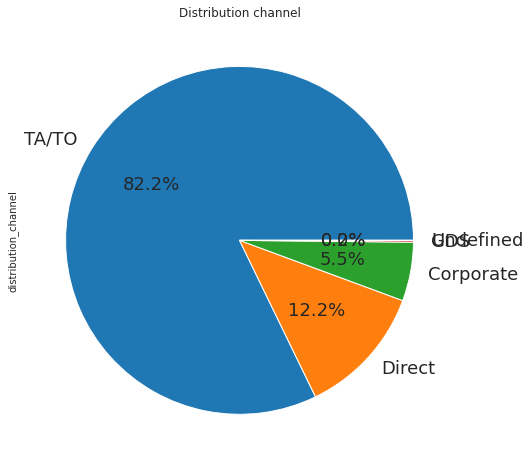

In [ ]:
percent = df["market_segment"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.title('Market Segment')
plt.show()


percent = df["distribution_channel"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.title('Distribution channel')

In [ ]:
# Frow above we see that the majority of the distribution channels and market segments involve travel agencies (online or offline).
# We have to focus on targeting these travel agencies website and work with them since majority of the visitors tend to reach out to them.

###Q. Which months has cheaper booking rates?

In [ ]:
df['arrival_date_month'].value_counts()

August       13856
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

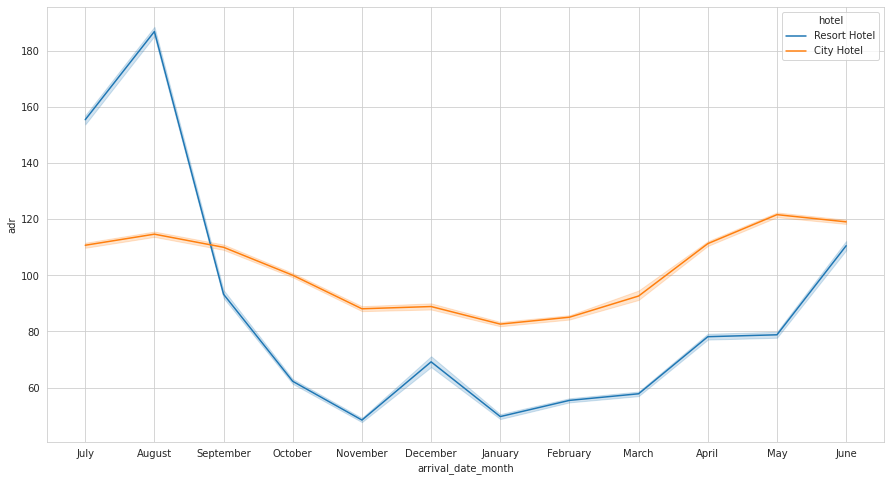

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x='arrival_date_month', y='adr', hue='hotel')
plt.show()

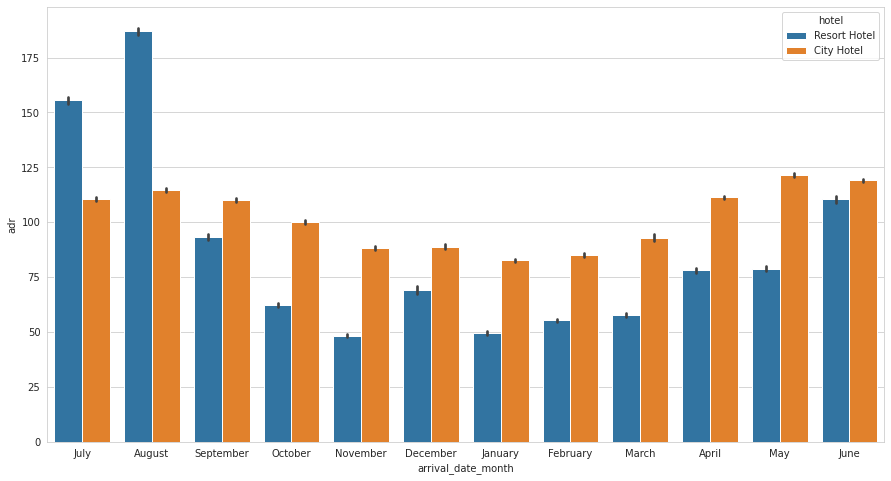

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data = df,x='arrival_date_month', y='adr', hue='hotel')
plt.show()

In [ ]:
# For both city and resort hotels, Nov to Jan have cheaper average monthly rates. 

##Conclusion:
1.  There are less number of feature with the missing values and outliers so dealing with them is easy.
2.  After the peak in 2016 there is fall in bookings in year 2017. After 2015 bookings increased in 2016 then decreased in 2017.
1.  City hotels has higher number of bookings so we have to focus on them
and May to Aug period to be targeted as there is peak of summer period.
2.  1/3 of bookings where canceled Which is worse.
4.  As booking rate for country PRT,GBR,FRA is high so we have to focus on advertisement in that country.
7.  As average daily rate increases with increase in number of people so
we have to encourage large group people/families to book by giving offers and discount.
7.  We can say that more than 93% of customers not prefer for the parking, so we can commit that most of the customers reach the hotel by transport.
8.  Frow above we see that the majority of the distribution channels and market segments involve travel agencies (online or offline). We have to focus on targeting these travel agencies website and work with them since majority of the visitors tend to reach out to them.
9.  For both city and resort hotels, November to January have cheaper average monthly rate.
  
  